<a href="https://colab.research.google.com/github/ritwiks9635/my_new_project_2/blob/main/Diabetes_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
https://www.kaggle.com/datasets/ mathchi/diabetes-data-set

In [ ]:
! unzip /content/https:/www.kaggle.com/datasets/mathchi/diabetes-data-set/diabetes-data-set.zip

Archive:  /content/https:/www.kaggle.com/datasets/mathchi/diabetes-data-set/diabetes-data-set.zip
  inflating: diabetes.csv            


In [ ]:
#zipfile
from zipfile import ZipFile
data = "/content/https:/www.kaggle.com/datasets/dataturks/vehicle-number-plate-detection/code?datasetId=36674&sortBy=voteCount/vehicle-number-plate-detection.zip"
with ZipFile(data,"r") as z:
  z.extractall()
  print("the data has been extracted ")

the data has been extracted 


In [ ]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

**OSEMN Pipeline
- Obtaining our dataS
- Scrubbing / Cleaning our dataE
- Exploring / Visualizing our data will
  allow us to find patterns and trendsM
- Modeling our data will give us our
  predictive power as a wizardN
- INterpreting our data**

In [ ]:
data = pd.read_csv("/content/diabetes.csv")
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1


DataFrame.describe() method generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. This method tells us a lot of things about a dataset. One important thing is that the describe() method deals only with numeric values. It doesn't work with any categorical values. So if there are any categorical values in a column the describe() method will ignore it and display summary for the other columns unless parameter include="all" is passed.
Now, let's understand the statistics that are generated by the describe() method:
count tells us the number of NoN-empty rows in a feature.mean tells us the mean value of that feature.std tells us the Standard Deviation Value of that feature.min tells us the minimum value of that feature.25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.max tells us the maximum value of that feature.

In [ ]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

T is transforme

In [ ]:
data.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [ ]:
data2 = data.copy(deep = True)

**Can minimum value of below listed columns be zero (0)?

On these columns, a value of zero does not make sense and thus indicates missing value.**

In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
data2[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']] = data2[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

In [ ]:
data2.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

To fill these Nan values the data distribution needs to be understood

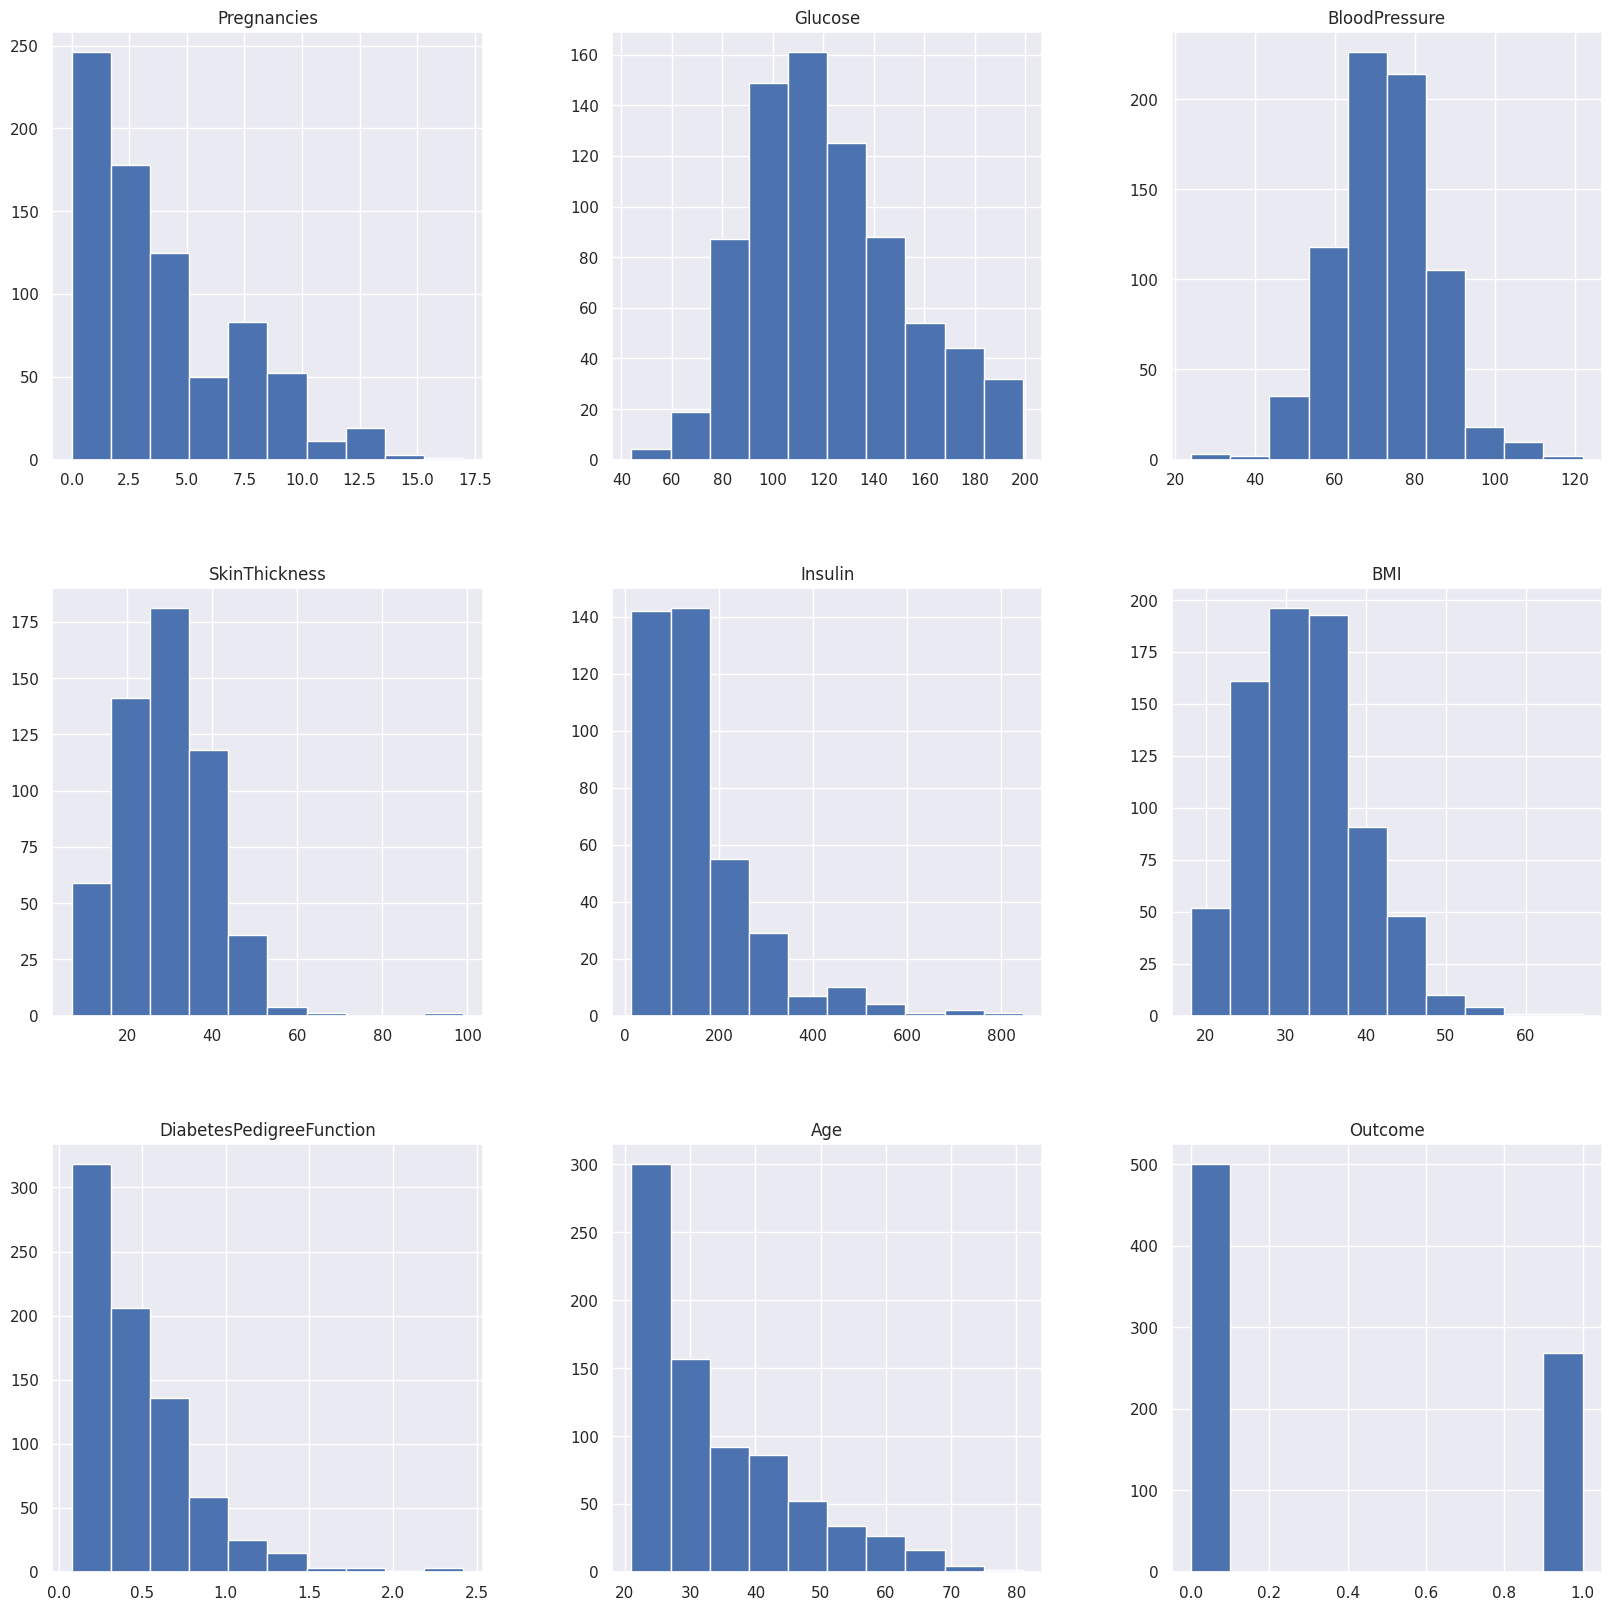

In [ ]:
P = data2.hist(figsize=(20,20))

Aiming to impute nan values for the columns in accordance with their distribution

In [ ]:
data2['Glucose'].fillna(data2['Glucose'].mean(), inplace = True)
data2['BloodPressure'].fillna(data2['BloodPressure'].mean(), inplace = True)
data2['SkinThickness'].fillna(data2['SkinThickness'].median(), inplace = True)
data2['Insulin'].fillna(data2['Insulin'].median(), inplace = True)
data2['BMI'].fillna(data2['BMI'].median(), inplace = True)

In [ ]:
data2.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Plotting after Nan removal

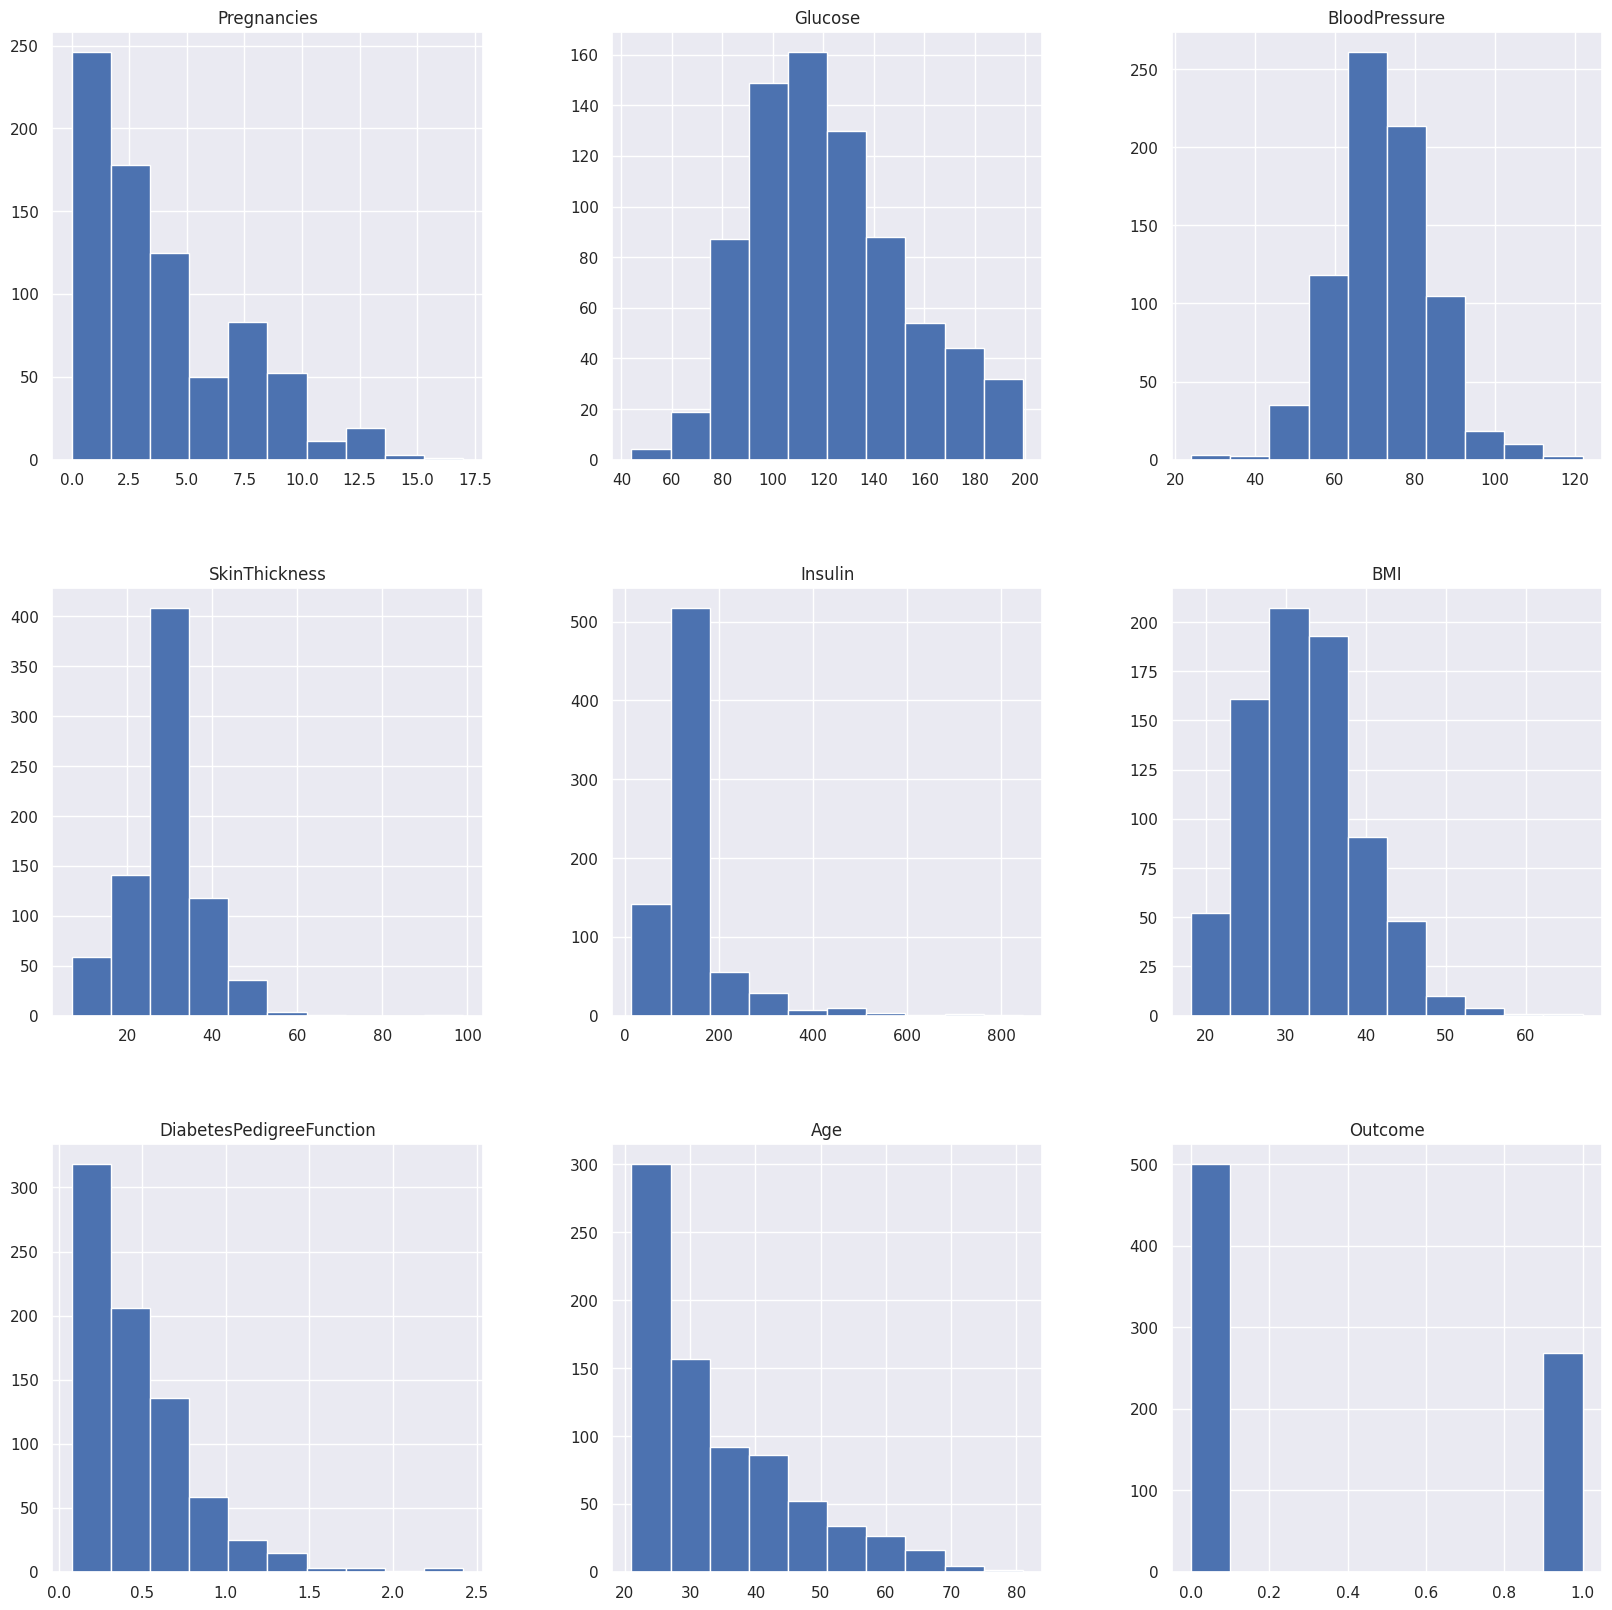

In [ ]:
P = data2.hist(figsize=(20,20))

**Skewness**

A left-skewed distribution has a long left tail. Left-skewed distributions are also called negatively-skewed distributions. That’s because there is a long tail in the negative direction on the number line. The mean is also to the left of the peak.

A right-skewed distribution has a long right tail. Right-skewed distributions are also called positive-skew distributions. That’s because there is a long tail in the positive direction on the number line. The mean is also to the right of the peak.

In [ ]:
data2.shape

(768, 9)

In [ ]:
## data type analysis
#plt.figure(figsize=(5,5))
#sns.set(font_scale=2)

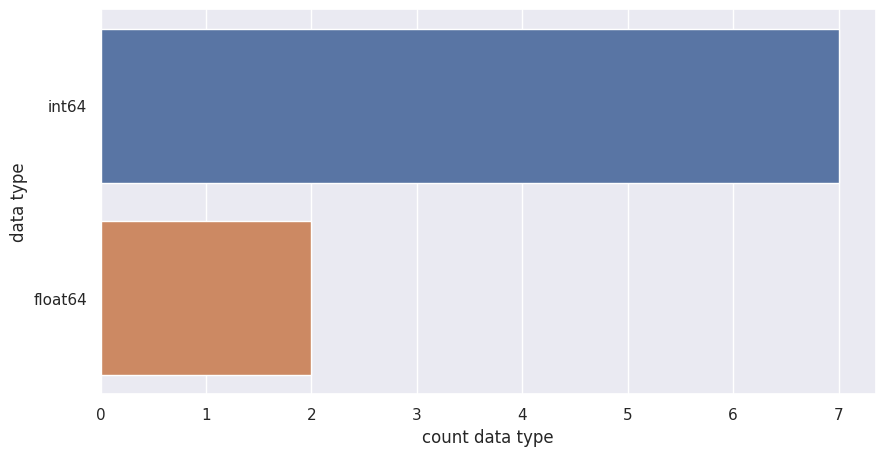

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y = data.dtypes, data = data)
plt.xlabel("count data type")
plt.ylabel("data type")
plt.show()

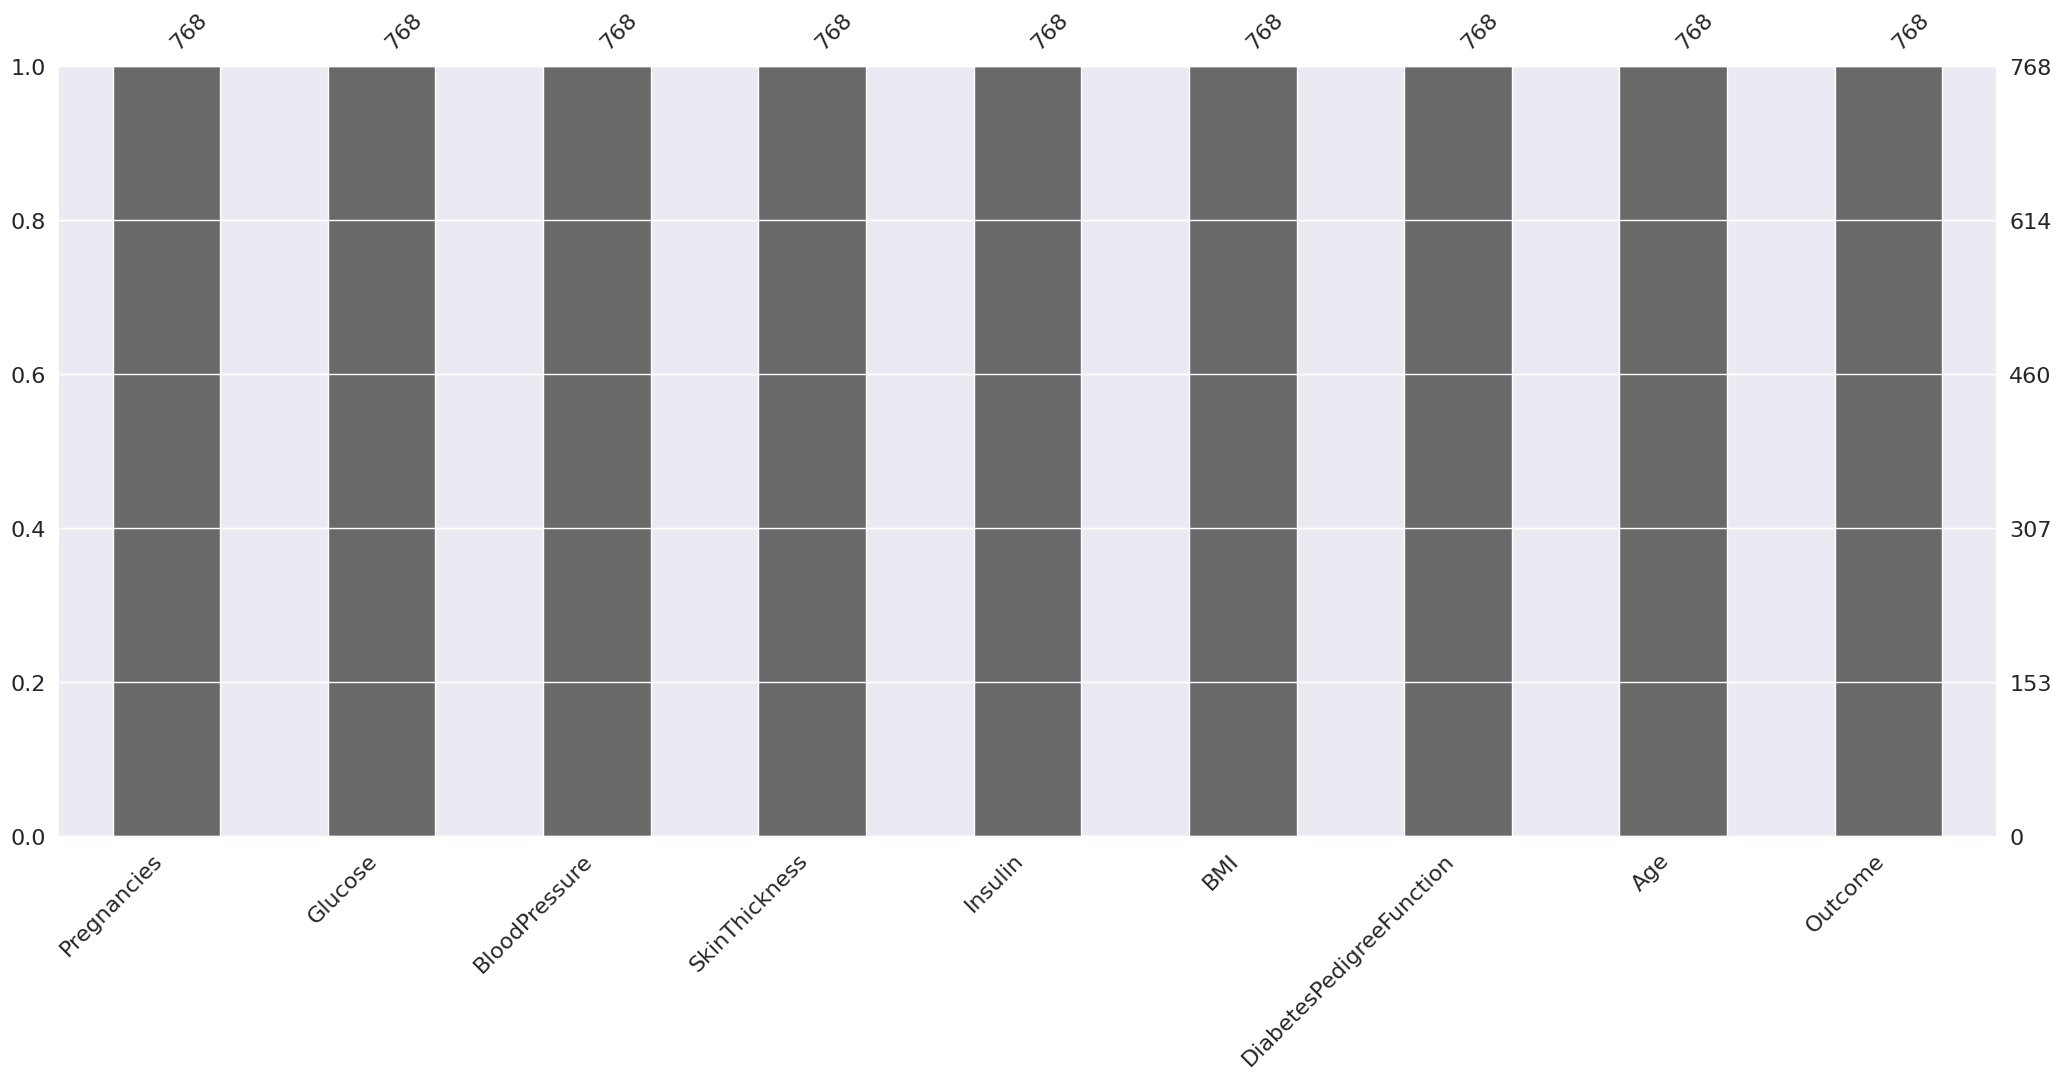

In [ ]:
## null count analysis
import missingno as msno
d = msno.bar(data)

## checking the balance of the data by plotting the count of outcomes by their value

In [ ]:
data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

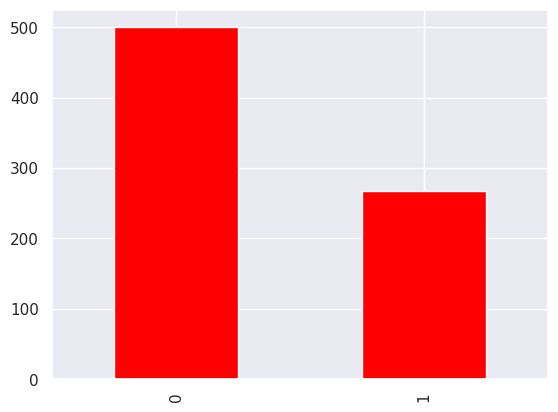

In [ ]:
K = data["Outcome"].value_counts().plot(kind = "bar", color = "red")

In [ ]:
#The above graph shows that the data is
#biased towards datapoints having outcome
#value as 0 where it means that diabetes
# was not present actually. The number of
# non-diabetics is almost twice the number
# of diabetic patients

In [ ]:
# Scatter matrix of uncleaned data

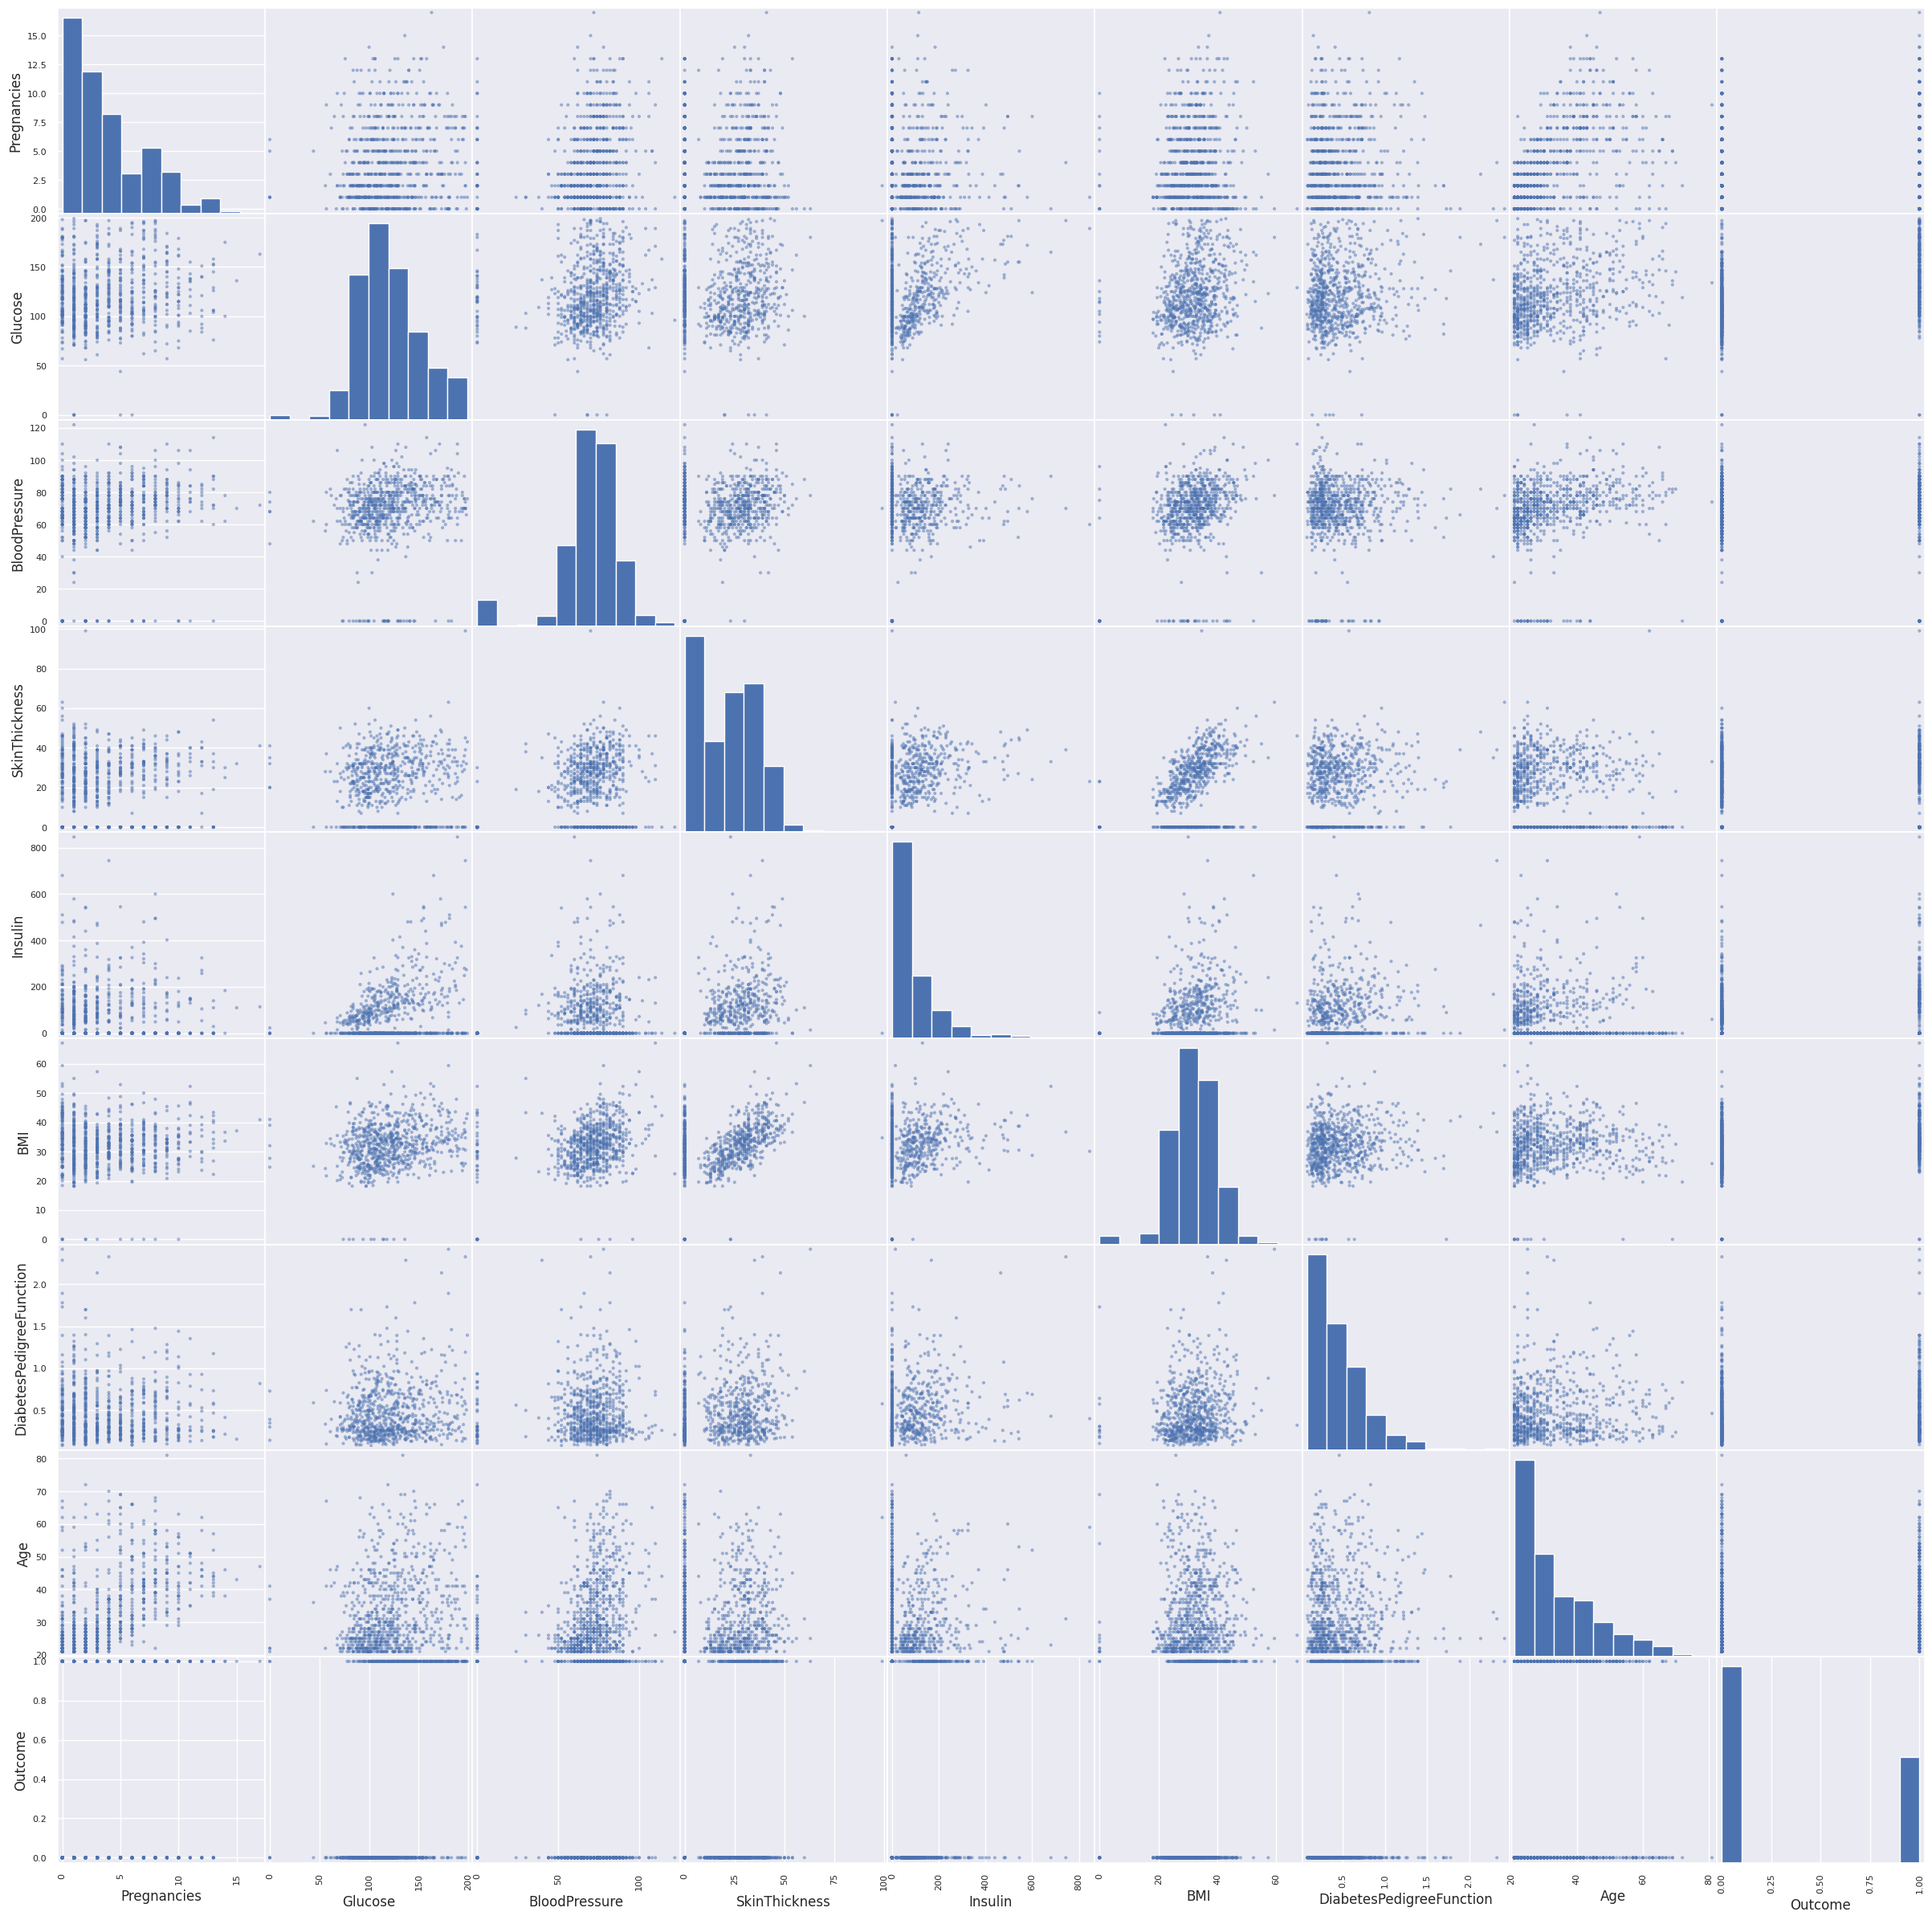

In [ ]:
from pandas.plotting import scatter_matrix
R = scatter_matrix(data, figsize=(30,30))

The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

In [ ]:
# Pair plot for clean data

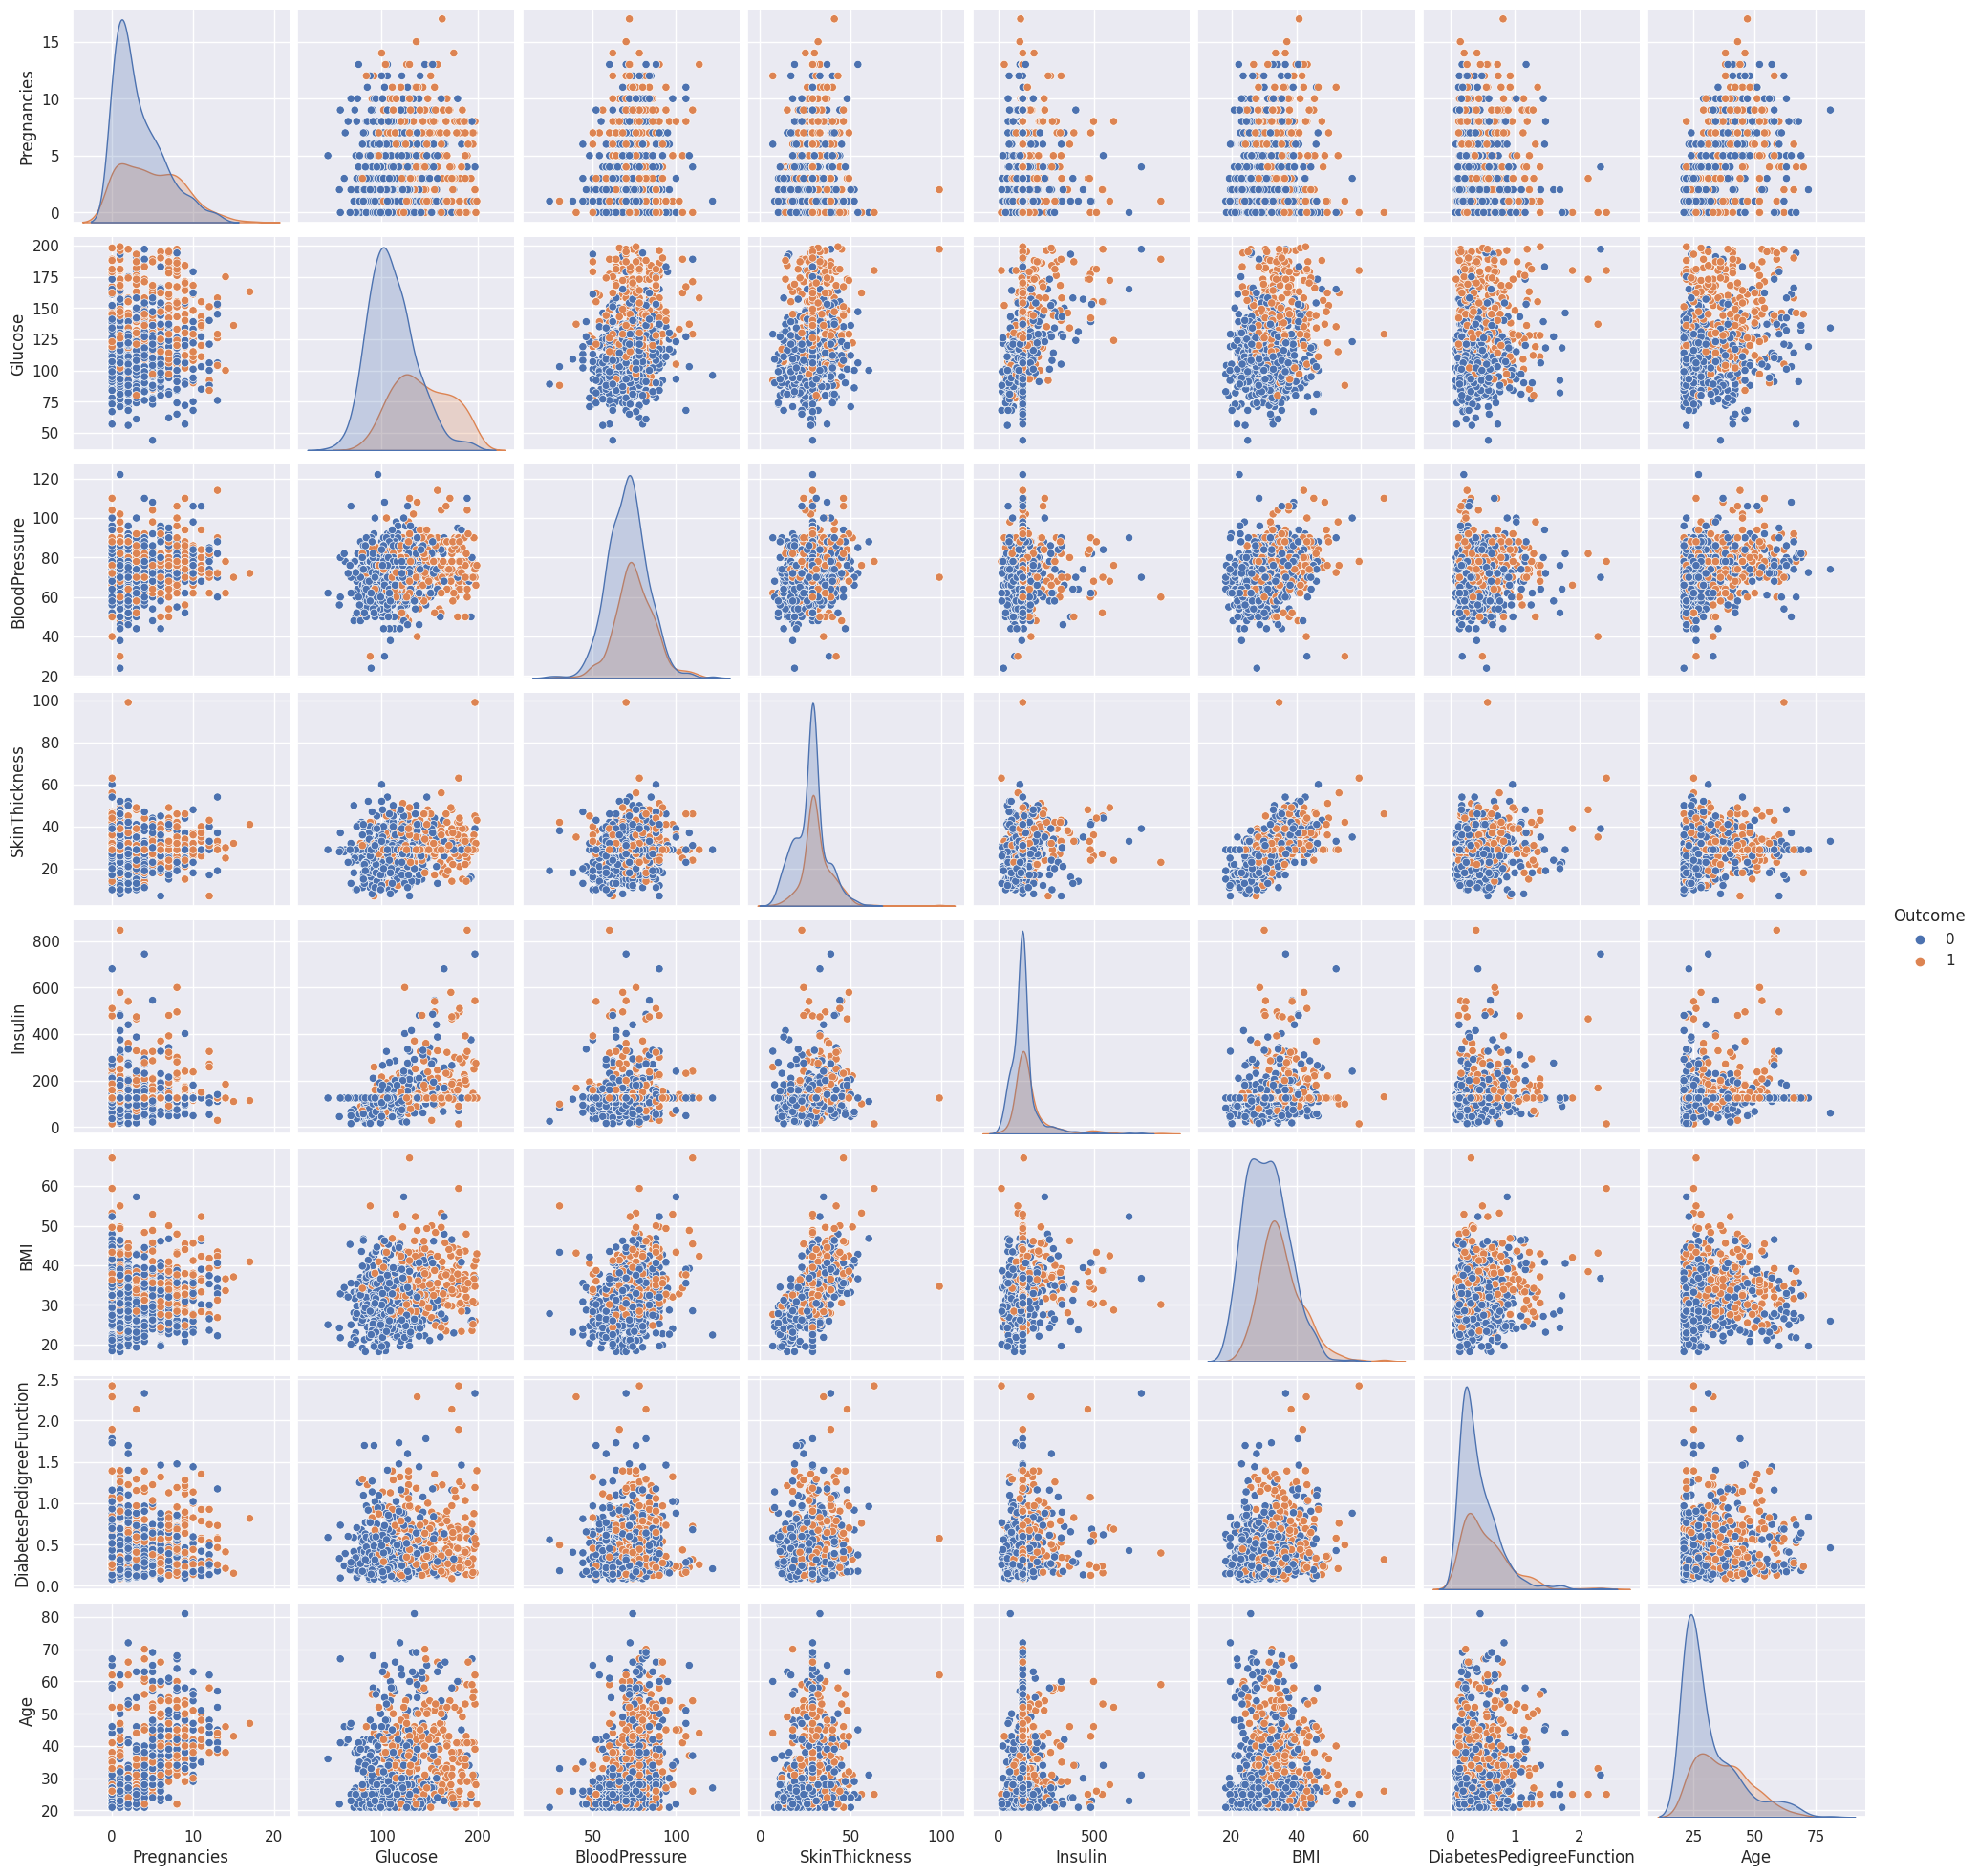

In [ ]:
sns.pairplot(data2, hue = "Outcome")


Pearson's Correlation Coefficient: helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

Heatmap for unclean data

<Axes: >

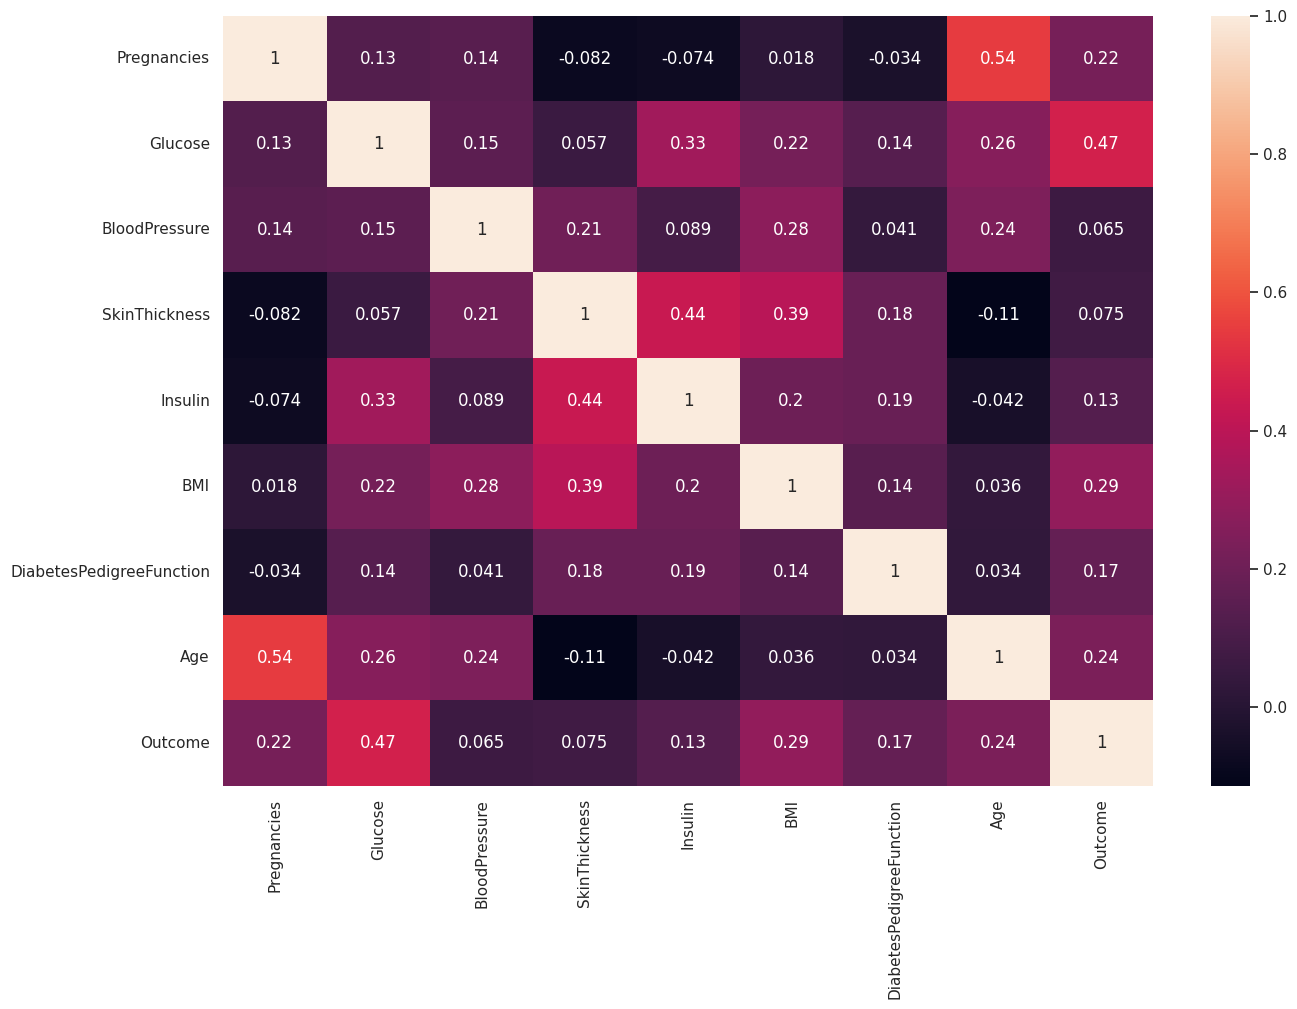

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot = True)

Heatmap for clean data

<Axes: >

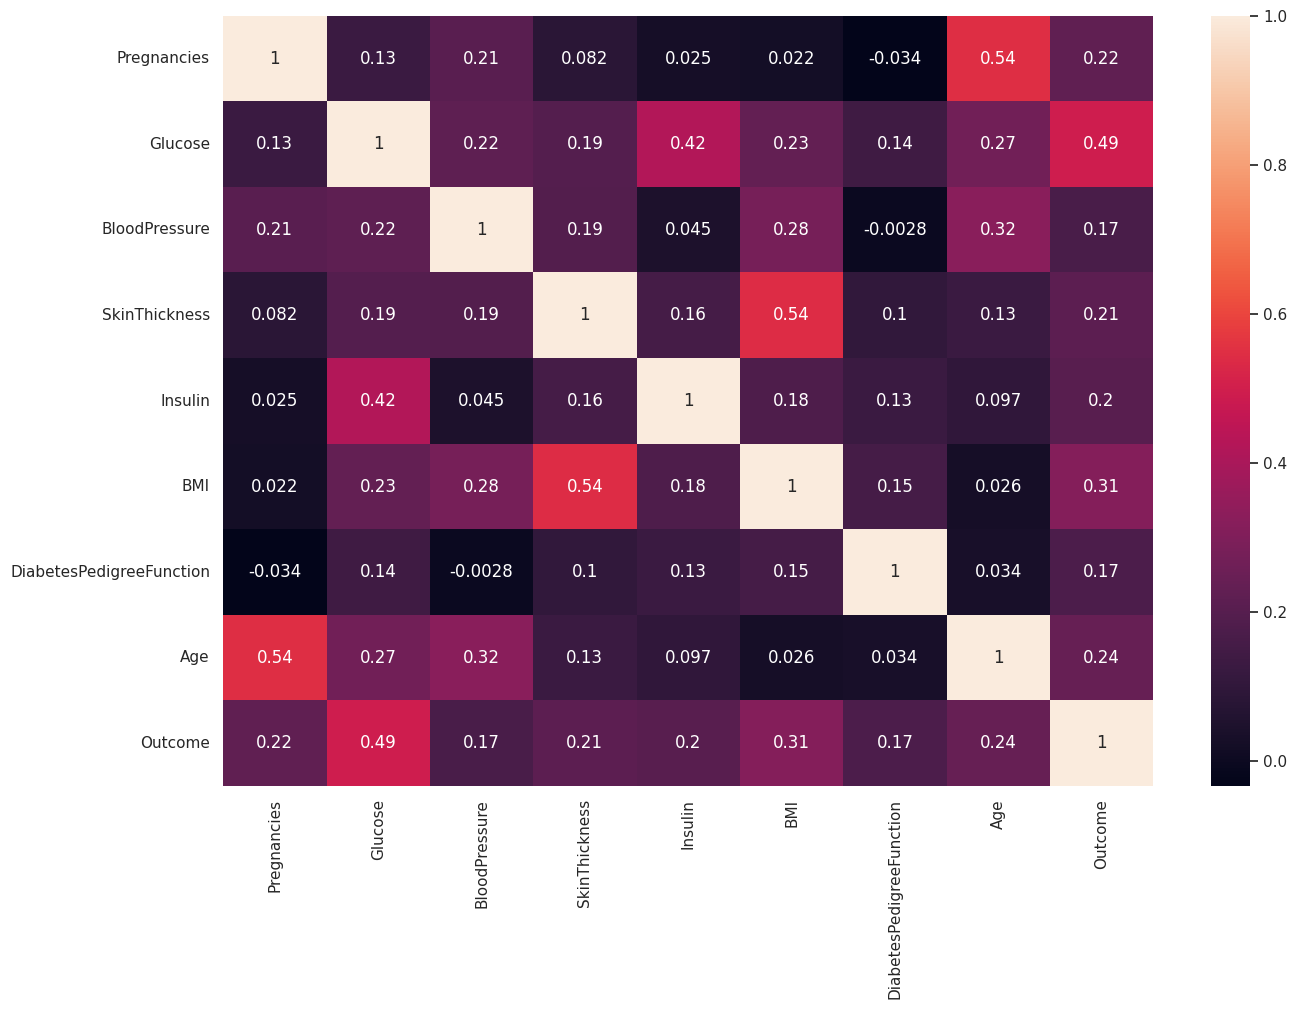

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data2.corr(), annot = True)

Scaling the data
data Z is rescaled such that μ = 0 and 𝛔 = 1, and is done through this formula:

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = data2.drop(["Outcome"], axis = 1)
x = sc.fit_transform(x)
x = pd.DataFrame(x, columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [ ]:
x.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.865108      -0.033518       0.670643 -0.181541  0.166619   
1    -0.844885 -1.206162      -0.529859      -0.012301 -0.181541 -0.852200   
2     1.233880  2.015813      -0.695306      -0.012301 -0.181541 -1.332500   
3    -0.844885 -1.074652      -0.529859      -0.695245 -0.540642 -0.633881   
4    -1.141852  0.503458      -2.680669       0.670643  0.316566  1.549303   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496

In [ ]:
y = data2["Outcome"]


Why Scaling the data for KNN?

it is always advisable to bring all the features to the same scale for applying distance based algorithms like KNN.Let's see an example of distance calculation using two features whose magnitudes/ranges vary greatly.

Euclidean Distance = [(100000–80000)^2 + (30–25)^2]^(1/2)

We can imagine how the feature with greater range with overshadow or dimenish the smaller feature completely and this will impact the performance of all distance based model as it will give higher weightage to variables which have higher magnitude.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 42, stratify = y)
x_train.shape, y_train.shape

((537, 8), (537,))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
train_score = []
test_score = []
for i in range(1,15):
  knc = KNeighborsClassifier(i)
  knc.fit(x_train, y_train)
  train_score.append(knc.score(x_train, y_train))
  test_score.append(knc.score(x_test, y_test))

In [ ]:
## score that comes from testing
## on the same datapoints that were
## used for training

In [ ]:
max_train_score = max(train_score)
train_scores_ind = [i for i, v in enumerate(train_score) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely

In [ ]:
max_test_score = max(test_score)
test_scores_ind = [i for i, v in enumerate(test_score) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 75.32467532467533 % and k = [11]


Result Visualisation

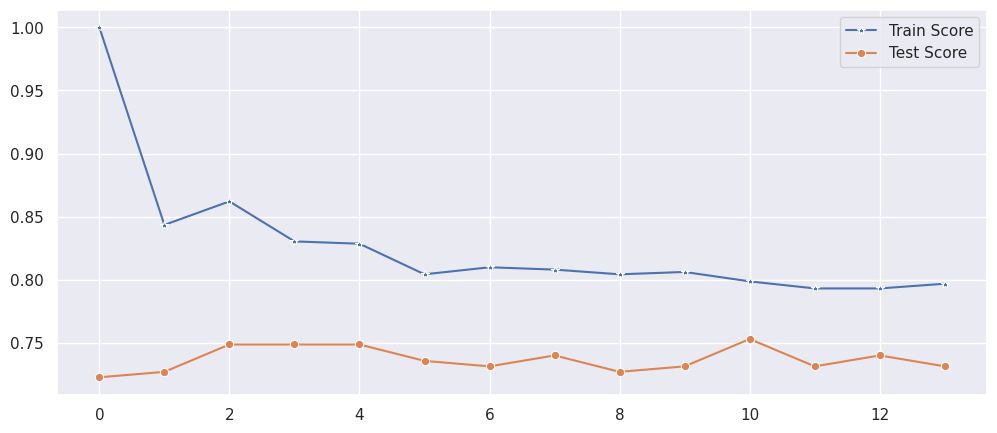

In [ ]:
plt.figure(figsize=(12,5))
p = sns.lineplot(train_score,marker='*',label='Train Score')
p = sns.lineplot(test_score,marker='o',label='Test Score')

The best result is captured at k = 11 hence 11 is used for the final model

In [ ]:
knc = KNeighborsClassifier(11)
knc.fit(x_train, y_train)
knc.score(x_test, y_test)

0.7532467532467533


Model Performance Analysis

1. Confusion Matrix
The confusion matrix is a technique used for summarizing the performance of a classification algorithm i.e. it has binary outputs.

In the famous cancer example:Cases in which the doctor predicted YES (they have the disease), and they do have the disease will be termed as TRUE POSITIVES (TP). The doctor has correctly predicted that the patient has the disease.Cases in which the doctor predicted NO (they do not have the disease), and they don’t have the disease will be termed as TRUE NEGATIVES (TN). The doctor has correctly predicted that the patient does not have the disease.Cases in which the doctor predicted YES, and they do not have the disease will be termed as FALSE POSITIVES (FP). Also known as “Type I error”.Cases in which the doctor predicted NO, and they have the disease will be termed as FALSE NEGATIVES (FN). Also known as “Type II error”.

In [ ]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knc.predict(x_test)
c_m = confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted    0   1  All
True                   
0          127  23  150
1           34  47   81
All        161  70  231

Text(0.5, 19.049999999999997, 'Predicted label')

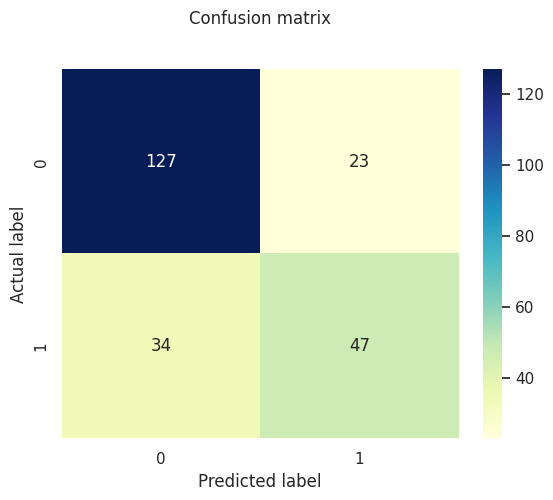

In [ ]:
p = sns.heatmap(pd.DataFrame(c_m), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

2. Classification Report
Report which includes Precision, Recall and F1-Score.

Precision Score    TP – True Positives
    FP – False Positives

    Precision – Accuracy of positive predictions.
    Precision = TP/(TP + FP)



Recall Score    FN – False Negatives


    Recall(sensitivity or true positive rate): Fraction of positives that were correctly identified.
    Recall = TP/(TP+FN)


F1 Score    F1 Score (aka F-Score or F-Measure) – A helpful metric for comparing two classifiers.

    F1 Score takes into account precision and the recall.

    It is created by finding the the harmonic mean of precision and recall.


    F1 = 2 x (precision x recall)/(precision + recall)

In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       150
           1       0.67      0.58      0.62        81

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



3. ROC - AUC

ROC (Receiver Operating Characteristic) Curve tells us about how good the model can distinguish between two things (e.g If a patient has a disease or no). Better models can accurately distinguish between the two. Whereas, a poor model will have difficulties in distinguishing between the two

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = knc.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [ ]:
y_pred_proba

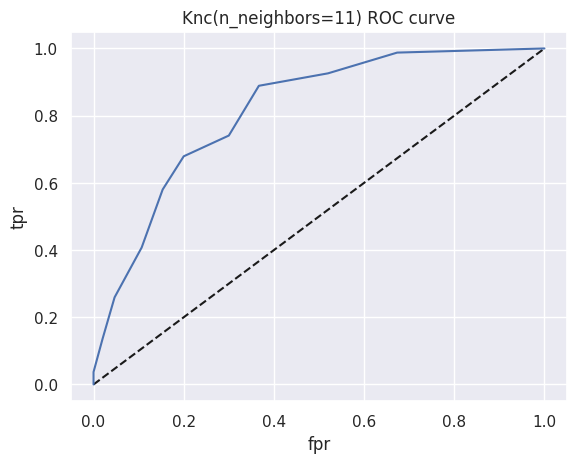

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knc')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knc(n_neighbors=11) ROC curve')
plt.show()

In [ ]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8152263374485597

Hyper Parameter optimization
Grid search is an approach to hyperparameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid.

Let’s consider the following example:

Suppose, a machine learning model X takes hyperparameters a1, a2 and a3. In grid searching, you first define the range of values for each of the hyperparameters a1, a2 and a3. You can think of this as an array of values for each of the hyperparameters. Now the grid search technique will construct many versions of X with all the possible combinations of hyperparameter (a1, a2 and a3) values that you defined in the first place. This range of hyperparameter values is referred to as the grid.

Suppose, you defined the grid as: a1 = [0,1,2,3,4,5] a2 = [10,20,30,40,5,60] a3 = [105,105,110,115,120,125]

Note that, the array of values of that you are defining for the hyperparameters has to be legitimate in a sense that you cannot supply Floating type values to the array if the hyperparameter only takes Integer values.

Now, grid search will begin its process of constructing several versions of X with the grid that you just defined.

It will start with the combination of [0,10,105], and it will end with [5,60,125]. It will go through all the intermediate combinations between these two which makes grid search computationally very expensive.

In [ ]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knc = KNeighborsClassifier()
knc_cv= GridSearchCV(knc,param_grid,cv=5)
knc_cv.fit(x,y)

print("Best Score:" + str(knc_cv.best_score_))
print("Best Parameters: " + str(knc_cv.best_params_))

Best Score:0.7721840251252015
Best Parameters: {'n_neighbors': 25}
